<a href="https://colab.research.google.com/github/KazukiOtomo/Articles/blob/main/DS%E7%AC%AC3%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章　層別分析・可視化～クラスごとの傾向を視覚的に把握したい～

##３－１　層別分析の考え方

**ポイント**

「70点」というデータが優秀かどうかは、他の学習者と比べないと分からないように、分析するためには「何かと何かを比べる」ことが必要になる。

例えば、集団分析や学習者の学部・学科・入学年度・担当教員などの細かく分けて比較すると、より多くの情報を得ることができる。

この、データをグループ分けして、グループごとに分析することを**層別分析**という。

[層別分析の例](https://bellcurve.jp/statistics/course/9595.html)

気温の違いを、雪が多いか地域かどうかで分けた例


##３－２　分析データ

**ポイント**

・**dim関数**でデータの規模が分かる。（今回の学習者数は、790人）

・**summary関数**で、記述統計量をまとめて算出できるが、欠損値(NA`s)が混じるので注意する。

＝＞ベクトルに欠損値が混じると、平均値もNAになる。

欠損値＝テストを受けなかった人の点数・pandasでのNaN

<br>

・欠損値を削除するには、**na.omit関数**を使う。

・欠損値も含めてデータを精査したい場合は、NAを置き換える方法がある。

**is.na関数**で欠損値のある位置を特定し、そのセルを上書きする

＝＞0で置き換えたり、平均値・中央値などで置き換えたりする。

[欠損値の処理の仕方](https://uribo.github.io/practical-ds/03/handling-missing-data.html)

**サンプルコード**

In [ ]:
#あらかじめ、Slackで配布されたcsvデータをcolabに配置しよう！
#ファイルの読み込み
dat <- read.csv("data_ch3.csv",header = TRUE)
#読み込んだデータの冒頭を表示
head(dat)

,student,class,prof,sex,faculty,score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,S001,A,P03,M,F01,86
2,S002,A,P03,F,F01,96
3,S003,A,P03,M,F01,52
4,S004,A,P03,F,F01,72
5,S005,A,P03,F,F01,74
6,S006,A,P03,M,F01,90


In [ ]:
#行数と列数の確認
dim(dat)

#クラス別の学習者数
table(dat$class)

#担当教員別の学習者数
table(dat$prof)

#男女別の学習者数
table(dat$sex)

#学部別の学習者数
table(dat$faculty)

[1] 790   6


 A  B  C  D  E  F  G  H  I  J  K  L  M  N  O  P  Q  R  S 
29 28 27 34 34 36 38 46 44 46 53 54 46 46 46 47 46 44 46 


P01 P02 P03 P04 P05 P06 P07 P08 P09 
 89  80 165 112  80  71  46 101  46 


  F   M 
236 554 


F01 F02 F03 F04 F05 F06 F07 F08 F09 
 48  36 111  74  68  53  21 243 136 

In [ ]:
#scoreの記述統計量
summary(dat$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  24.00   60.00   72.00   70.63   82.00  100.00      22 

In [ ]:
#欠損値(NA)を含む行を削除する方法
dat.new <- na.omit(dat)

#行数と列数の確認
dim(dat.new)

[1] 768   6

In [ ]:
#欠損値を含む行を0に置き換える方法
dat$score[is.na(dat$score)] <- 0

##３－３　ヒストグラム

**ポイント1**

・ヒストグラムを使ってデータを可視化することで、

　記述統計量や検定では分からないデータの性質が分かる。　（※データに偏りがあるとか）

・**hist関数**を使うと、ヒストグラムが描画される。

・hist関数の引数でタイトルや軸ラベル名を指定することもできる。

| 引数 | 対応       |     
| ---- | ---------- |  
| main | タイトル   |      
| xlab | 横軸ラベル |      
| ylab | 縦軸ラベル |     
| col  | 棒の着色　 |


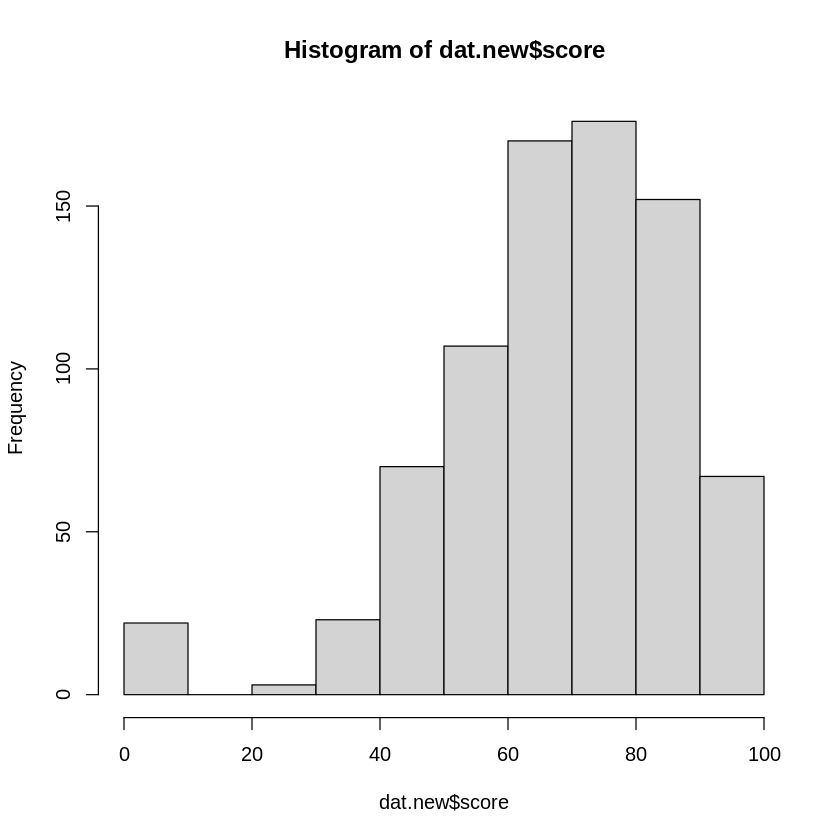

In [ ]:
#ここから先は、欠損値を除いたデータを使う。
#ヒストグラムの描画
hist(dat.new$score)

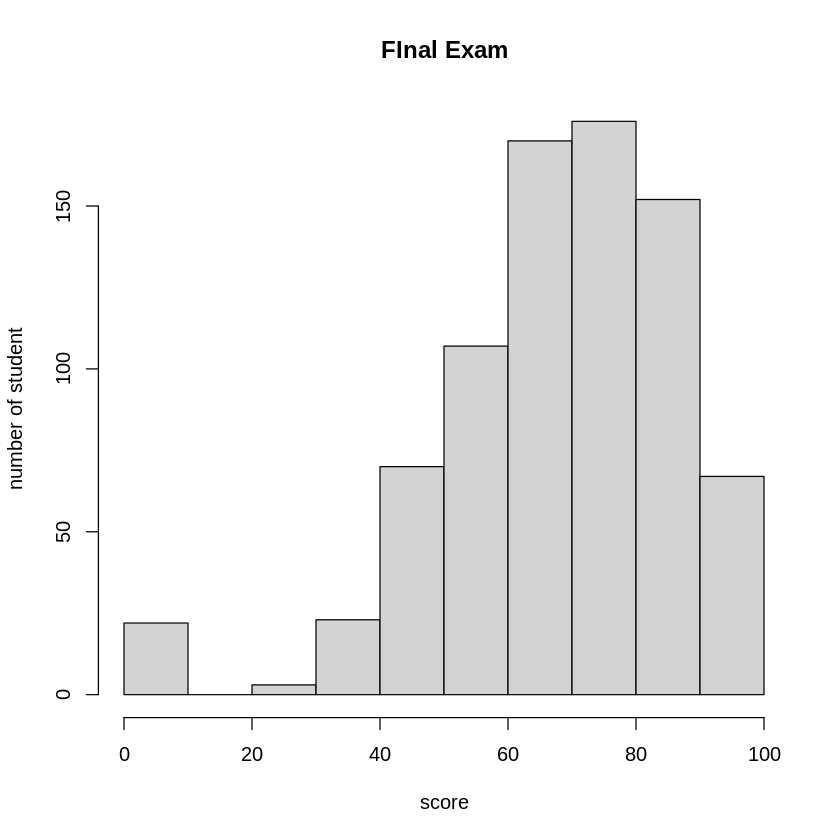

In [ ]:
#ヒストグラムのタイトルと軸ラベルを変更
hist(dat.new$score, main = "FInal Exam", xlab = "score", ylab = "number of student")

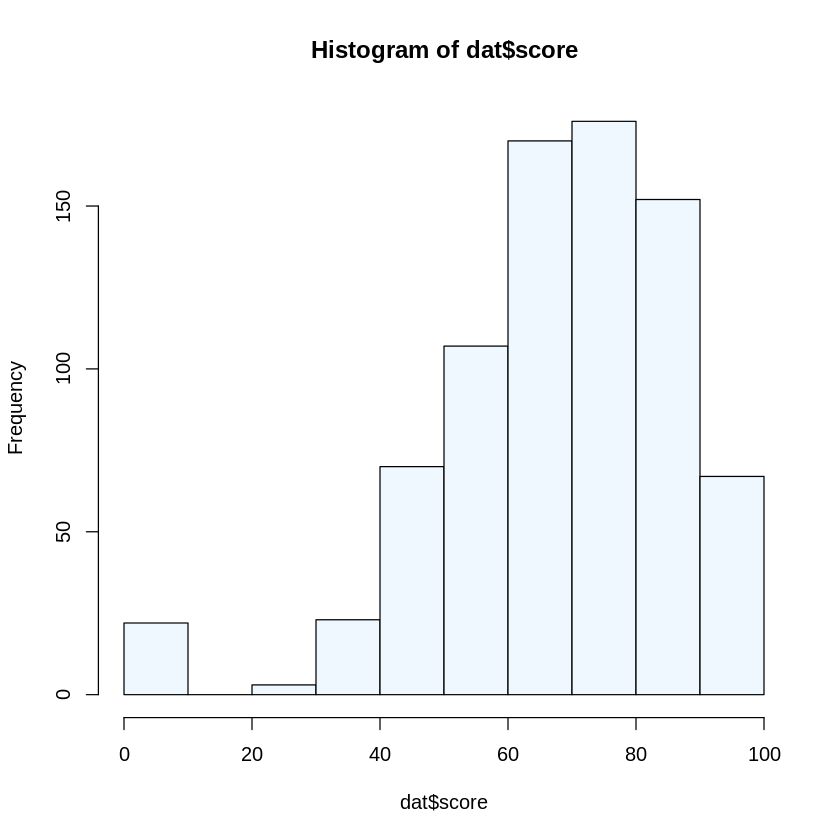

In [ ]:
#ヒストグラムの色を変更
hist(dat$score, col = "aliceblue")

**ポイント2**

・今回は、男女別の得点分布を比較する。

　層別のヒストグラムを描く方法としては、**latticeパッケージのhistogram関数**を使用する。

・縦軸の値が百分率の合計になっているので注意


In [ ]:
#パッケージのインストール
install.packages("lattice", dependencies = TRUE)
#パッケージの読み込み
library("lattice")

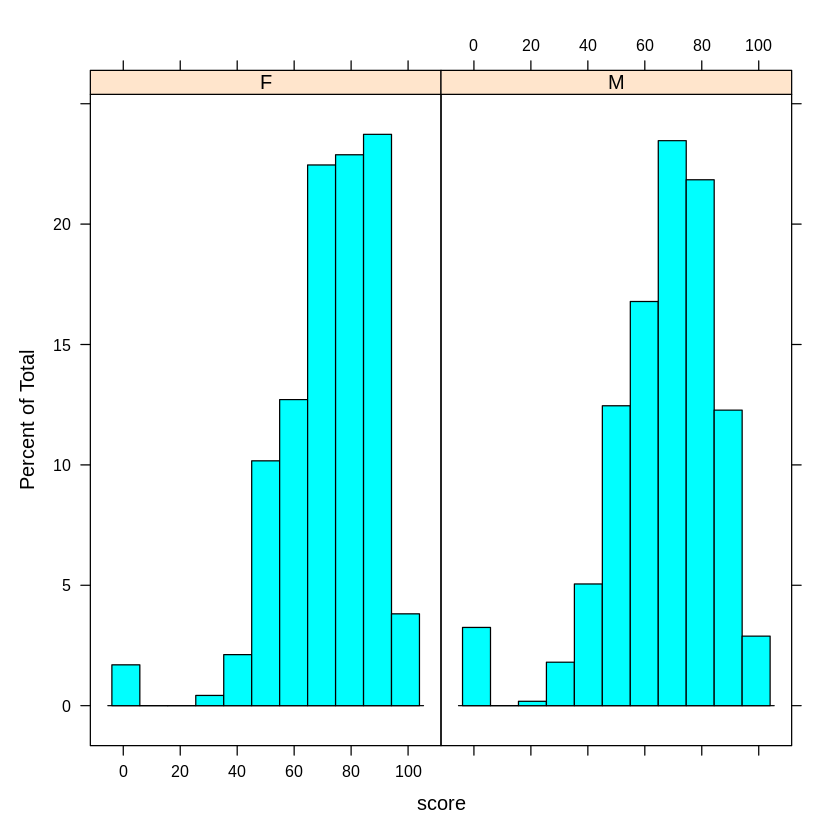

In [ ]:
#男女別の得点分布の比較
histogram(~ score | sex , data = dat)

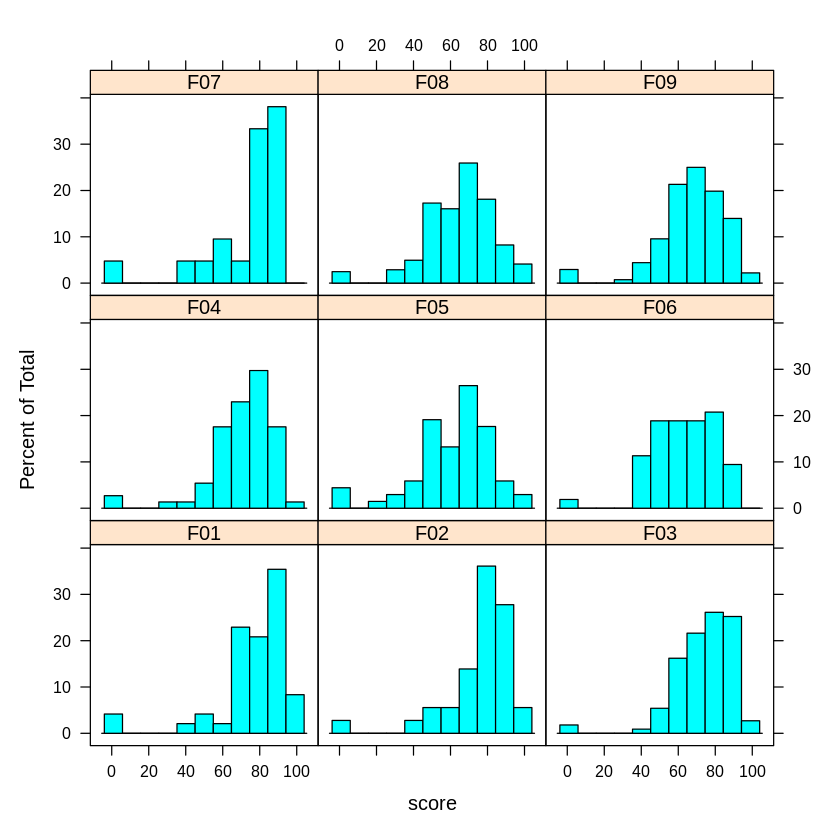

In [ ]:
#クラス別の得点分布の比較
histogram(~ score | faculty , data = dat)

##３－４　箱ひげ図

**ポイント**

・**boxplot関数**で箱ひげ図を描画できる。

・第3四分位数＋（四分位範囲）＊ 1.5　より大きいものと、

　第1四分位数ー（四分位範囲）＊ 1.5　より小さいものが**外れ値**と判断される。

<br>

・ノッチの両端の値は、(データの中央値)±1.58＊(四分位範囲) / (標本数の平方根)で算出される。

・2つの箱ひげ図を比較するとき、切込みがオーバーラップ(重なること)していなければ、2つのグループの中央値に有意差があるということになる。

[箱ひげ図の諸統計量について](https://clover.fcg.world/2017/04/16/8733/)

**サンプルコード**

$stats
[1]  30  60  71  82 100

$n
[1] 790

$conf
[1] 69.76329 72.23671

$out
 [1]  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

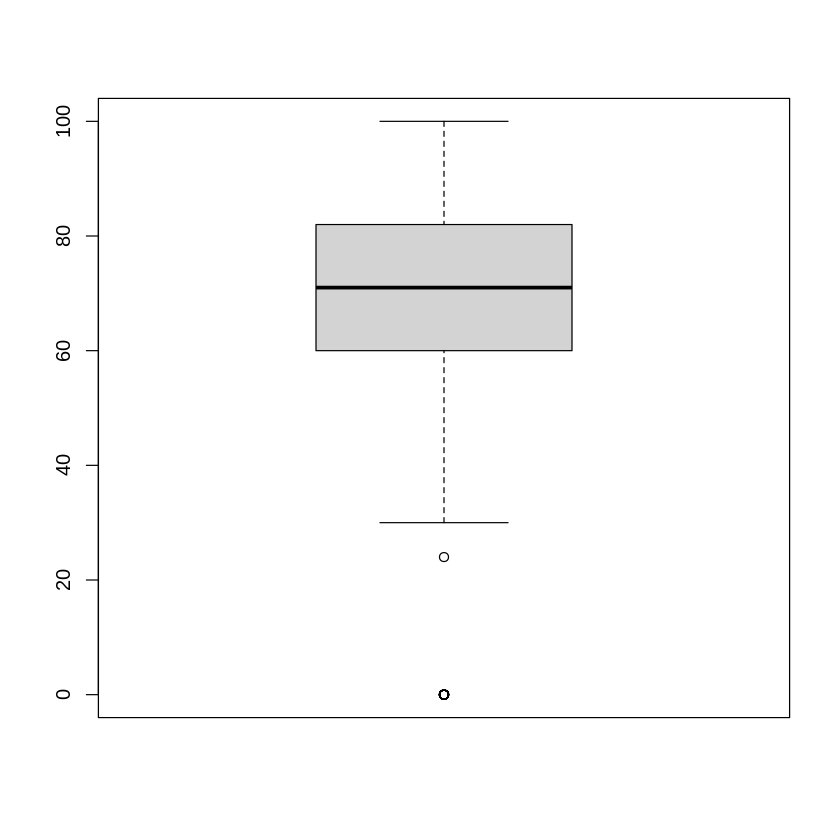

In [ ]:
#箱ひげ図の描画
#◯が外れ値を表している
boxplot(dat$score)

#箱ひげ図の描画に使われている要約統計量の確認
boxplot.stats(dat$score)

#stats : 長さ5のベクトル、最小値・第1四分位・中央値・第3四分位・最大値の位置

#n : 標本数

#conf : ノッチの下位及び上位の最端値(?)

#out : 外れ値

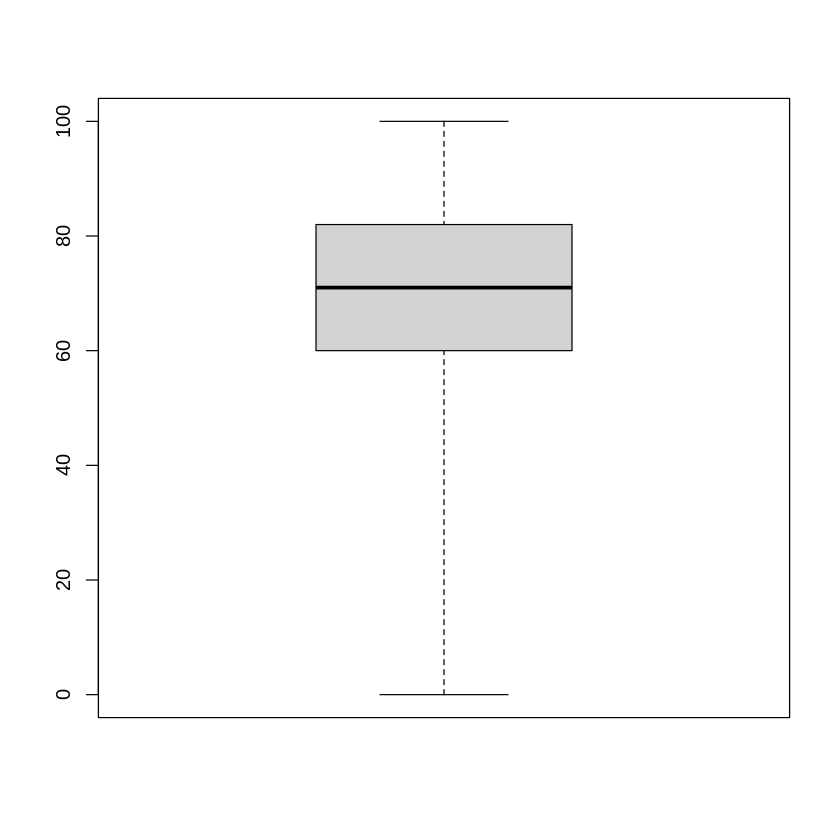

In [ ]:
#range = 0を指定すると、外れ値を排除できる
boxplot(dat$score, range = 0)

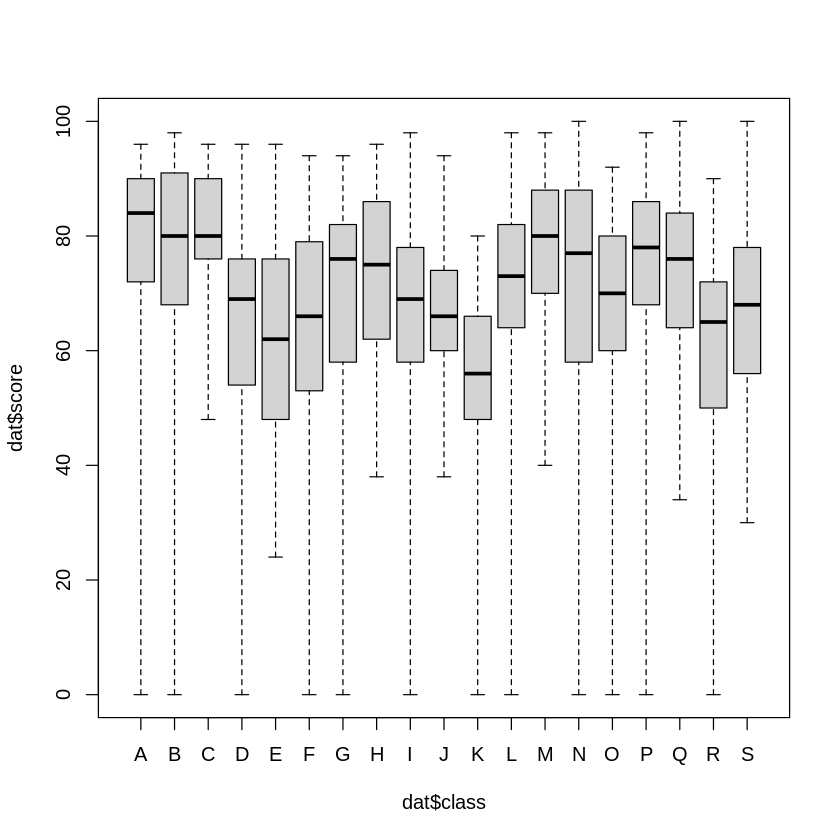

In [ ]:
#クラス別の箱ひげ図
boxplot(dat$score ~ dat$class, range = 0)

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


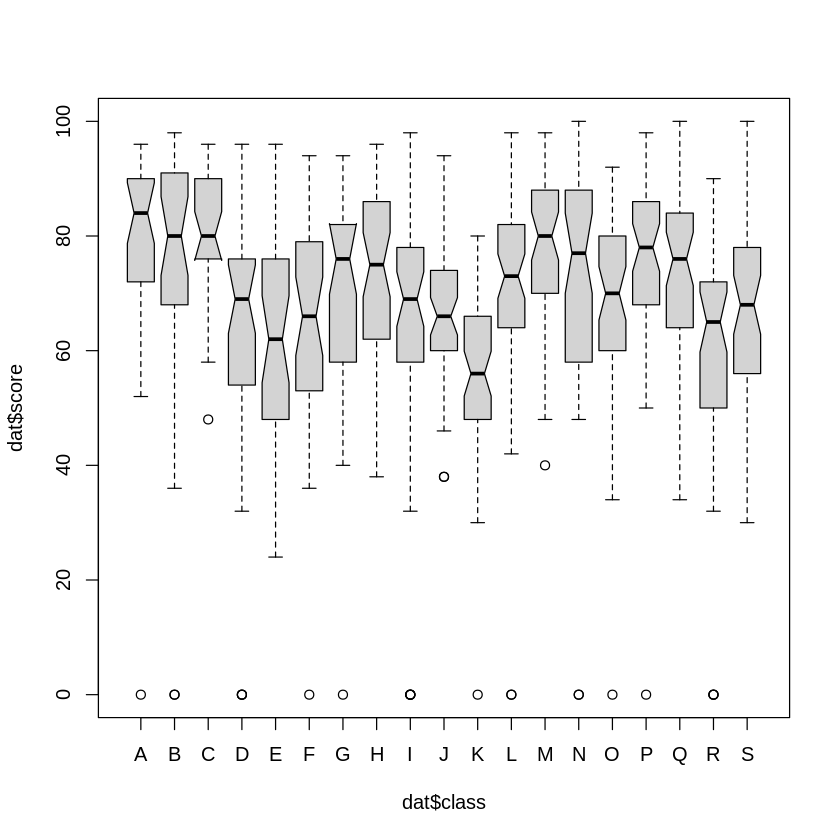

In [ ]:
#ノッチを入れた箱ひげ図
boxplot(dat$score ~ dat$class, ylim = c(0, 100),notch = TRUE)

##３－５　蜂群図

**ポイント**

・**蜂群図**：個々のデータを蜂の群れのようにプロットしたグラフ

＝＞個々のプロットが重ならないので、データの分布が見やすい

・beeswarmパッケージの**beeswarm関数**を使うと、蜂群図が書ける。

・蜂群図単体で用いられることは少なく、箱ひげ図に重ねて描画されることが多い。


**サンプルコード**

In [ ]:
#パッケージのインストール
install.packages("beeswarm", dependencies = TRUE)
#パッケージの読み込み
library("beeswarm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



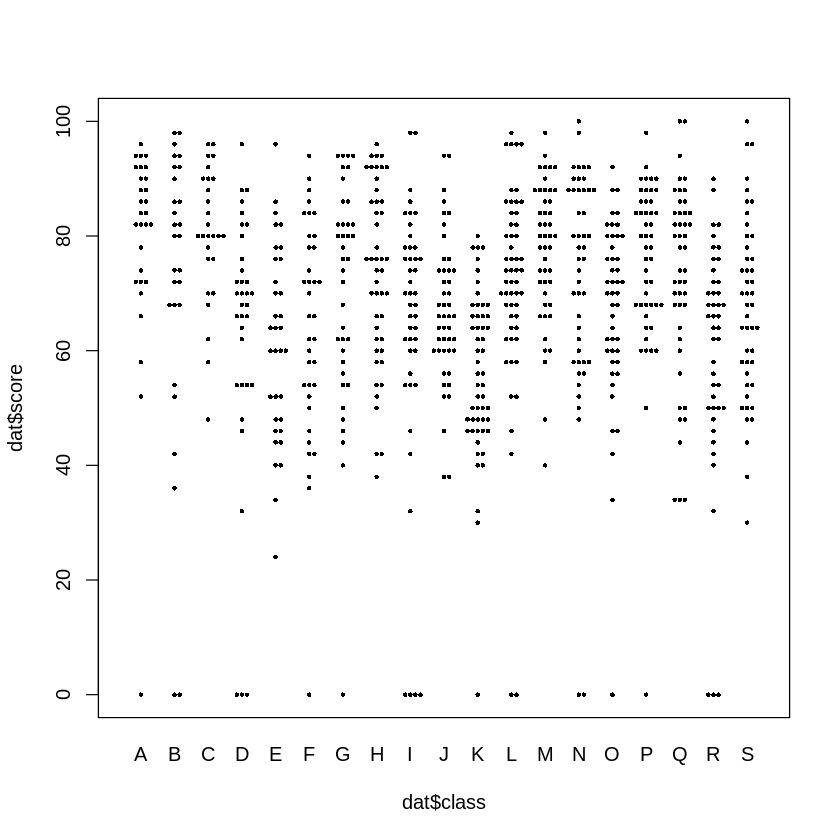

In [ ]:
#蜂群図の描画
beeswarm(dat$score ~ dat$class, ylim = c(0, 100), pch = 16, cex = 0.5)

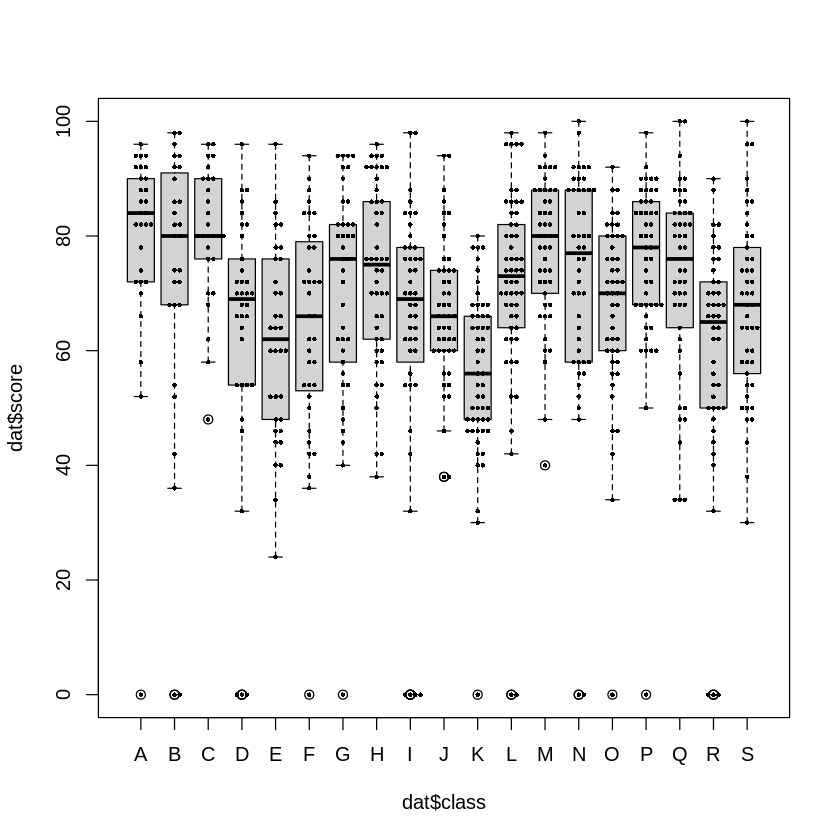

In [ ]:
#箱ひげ図に蜂群図を重ねて描画
boxplot(dat$score ~ dat$class, ylim = c(0, 100))
beeswarm(dat$score ~ dat$class, ylim = c(0, 100), pch = 16, cex = 0.5, add = TRUE)

##３－６　平均値±標準偏差のプロット

**ポイント**

・平均値±標準偏差のプロットをするためには、**gplotsパッケージのplotmeans関数**を用いる。

・**tapply関数**で、グループ分けした上での平均点・標準偏差を求められる。


**サンプルコード**

In [ ]:
#パッケージのインストール
install.packages("gplots",dependencies = TRUE)
#パッケージの読み込み
library("gplots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




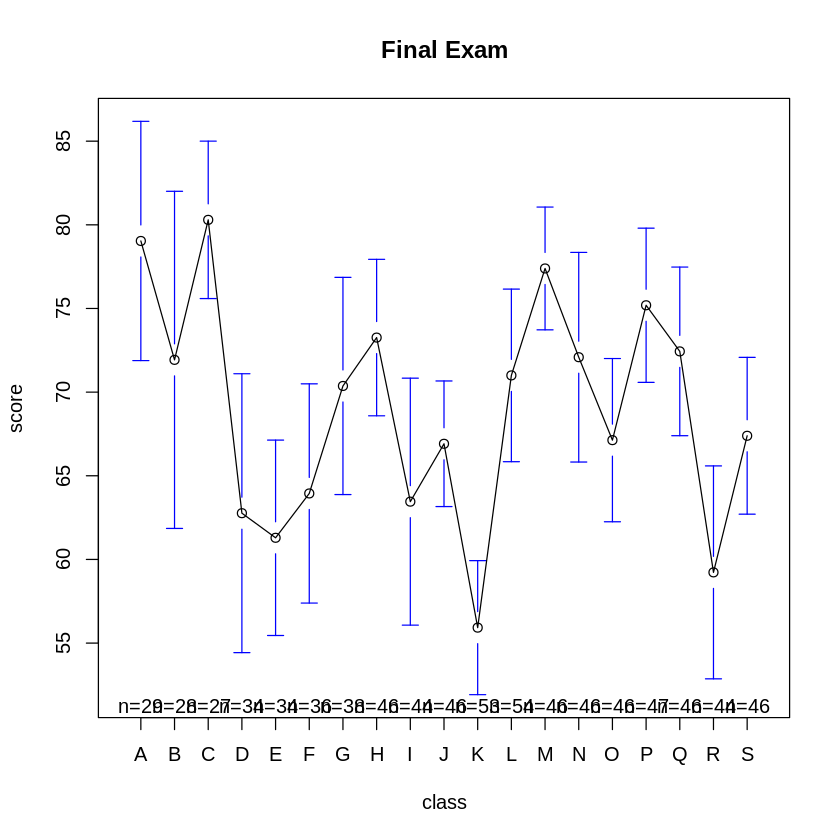

In [ ]:
#平均値±標準偏差のプロット
plotmeans(dat$score ~ dat$class, main = "Final Exam", xlab = "class", ylab = "score")

In [ ]:
#欠損値(NA)を含む行を削除
dat.new <- na.omit(dat)
#各クラスの平均点
tapply(dat.new$score, dat.new$class, mean)
#各クラスの標準偏差
tapply(dat.new$score,dat.new$class, sd)

A        B        C        D        E        F        G        H 
79.03448 71.92857 80.29630 62.76471 61.29412 63.94444 70.36842 73.26087 
       I        J        K        L        M        N        O        P 
63.45455 66.91304 55.92453 71.00000 77.39130 72.08696 67.13043 75.19149 
       Q        R        S 
72.43478 59.22727 67.39130

A        B        C        D        E        F        G        H 
18.79681 25.98280 11.89316 23.88871 16.73235 19.36410 19.74899 15.74440 
       I        J        K        L        M        N        O        P 
24.27503 12.64002 14.53358 18.89295 12.35670 21.09431 16.42574 15.69636 
       Q        R        S 
16.97011 20.92830 15.78111

In [ ]:
install.packages("psych",dependencies = TRUE)
#パッケージの読み込み
library("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘pbivnorm’, ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’




In [ ]:
#クラスごとの記述統計量
describeBy(dat.new$score, dat.new$class)


 Descriptive statistics by group 
group: A
   vars  n  mean   sd median trimmed   mad min max range skew kurtosis   se
X1    1 29 79.03 18.8     84      82 11.86   0  96    96 -2.6     8.09 3.49
------------------------------------------------------------ 
group: B
   vars  n  mean    sd median trimmed   mad min max range  skew kurtosis   se
X1    1 28 71.93 25.98     80   75.75 17.79   0  98    98 -1.48     1.59 4.91
------------------------------------------------------------ 
group: C
   vars  n mean    sd median trimmed   mad min max range  skew kurtosis   se
X1    1 27 80.3 11.89     80    81.3 14.83  48  96    48 -0.82     0.21 2.29
------------------------------------------------------------ 
group: D
   vars  n  mean    sd median trimmed   mad min max range  skew kurtosis  se
X1    1 34 62.76 23.89     69    66.5 17.79   0  96    96 -1.43     1.57 4.1
------------------------------------------------------------ 
group: E
   vars  n  mean    sd median trimmed   mad min max rang